In [78]:
## Algo trading homework 1 
### SK
## 2021

In [2]:
### LSTM

In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
BHP = web.DataReader('BHP', data_source='yahoo', start ='2012-01-01', end= '2021-03-14')

In [5]:
BHP

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,75.279999,74.269997,74.629997,74.760002,4694500.0,49.140343
2012-01-04,75.050003,73.739998,74.449997,74.790001,2617100.0,49.160076
2012-01-05,73.839996,72.709999,73.360001,73.379997,1883200.0,48.233261
2012-01-06,73.550003,72.300003,73.489998,72.449997,1924900.0,47.621967
2012-01-09,73.050003,72.160004,72.919998,72.709999,2276300.0,47.792877
...,...,...,...,...,...,...
2021-03-03,81.820000,79.529999,79.769997,81.000000,3770800.0,81.000000
2021-03-04,77.570000,74.980003,77.019997,76.000000,5894700.0,76.000000
2021-03-05,76.669998,74.300003,75.540001,76.370003,4320200.0,76.370003


In [6]:
data = BHP.filter(['Close'])

In [7]:
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len 

1848

In [8]:
# Scale the data
scaler = MinMaxScaler(feature_range =(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.88226861],
       [0.88274653],
       [0.86028351],
       ...,
       [0.90791782],
       [0.89867771],
       [0.88290588]])

In [9]:
# create training dataset
# create the scaled training dataset
train_data =scaled_data[0:training_data_len, :]


x_train=[]
y_train =[]


for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.88226861, 0.88274653, 0.86028351, 0.84546751, 0.84960965,
       0.88163135, 0.88864111, 0.90823639, 0.88529545, 0.90664329,
       0.93898356, 0.94201053, 0.93627529, 0.9471085 , 0.93579738,
       0.9679783 , 0.97243901, 0.96813765, 0.95682653, 0.95682653,
       0.97291693, 0.98008603, 1.        , 0.99378685, 0.99394608,
       0.97737776, 0.95969414, 0.91954751, 0.94057666, 0.91460888,
       0.90313842, 0.91636132, 0.90377568, 0.93213315, 0.93006214,
       0.9283097 , 0.93054006, 0.93436351, 0.94678981, 0.9150868 ,
       0.92257447, 0.90218258, 0.8754182 , 0.83782062, 0.85295519,
       0.87032023, 0.87239124, 0.8621953 , 0.89230521, 0.85996494,
       0.87589612, 0.88115344, 0.894217  , 0.85438905, 0.8410068 ,
       0.81758795, 0.83160747, 0.84801656, 0.83001437, 0.81870313])]
[0.8285805045275751]



In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train.shape[0]

1788

In [17]:
#train_data[61-60:61,0]
#train_data[61,0]

0.8446710270411097

In [18]:
#x_train = np.reshape(x_train, (1788, 60,1))
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#x_train.shape

In [19]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1788/1788 [==============================] - 18s 10ms/step - loss: 7.0897e-04


In [23]:
#create testing dataset
#create new array from index 1788 to 1848
test_data =scaled_data[training_data_len-60:, :]


x_test =[]
y_test =dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    


In [24]:
x_test =np.array(x_test)

In [25]:
#LSTM expects 3d, number of features is 1, which is closing price
x_test =np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [26]:
# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [27]:
# get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean( predictions-y_test )**2 )
rmse

0.35045587448846727

<ipython-input-29-60d014aa2bd9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


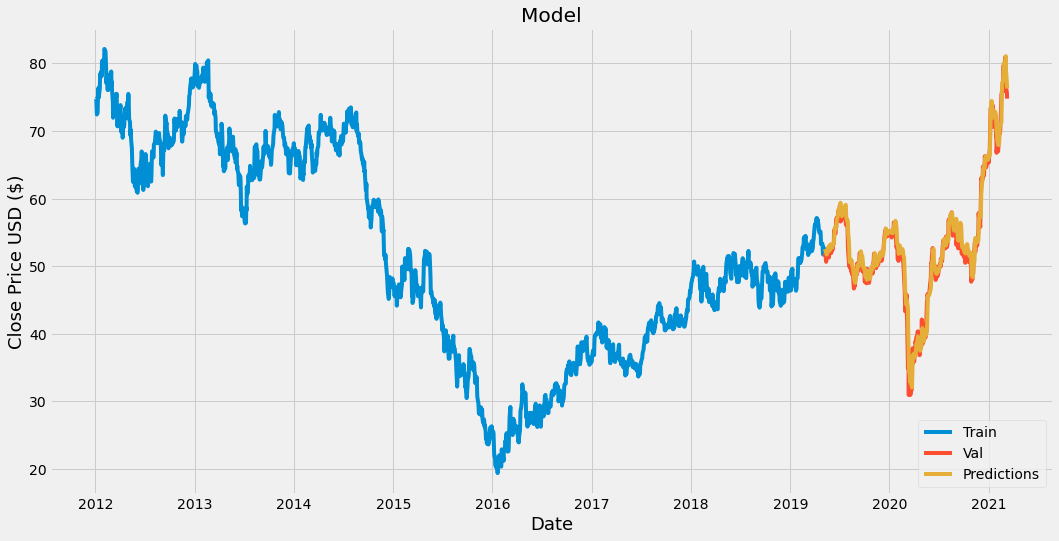

In [29]:
#plot the data
train  = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']= predictions
# visualize
plt.figure(figsize= (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc ='lower right')
plt.show()

In [30]:
valid

,Close,Predictions
Date,,
2019-05-09,51.450001,52.524654
2019-05-10,51.869999,52.302212
2019-05-13,50.650002,52.323357
2019-05-14,51.250000,51.881653
2019-05-15,51.419998,51.740818
...,...,...
2021-03-03,81.000000,79.592438
2021-03-04,76.000000,81.065880
2021-03-05,76.370003,78.925774


In [32]:
Bhp =web.DataReader('BHP', data_source='yahoo', start='2012-01-01', end='2021-03-15')

In [34]:
new_df = Bhp.filter(['Close'])

In [35]:
last_60_days= new_df[-60:].values

In [36]:
last_60_days_scaled = scaler.transform(last_60_days)

In [37]:
### Prediction for 9th march closing price for BHP
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[75.46491]], dtype=float32)

In [39]:
### BHP prediction price for 10th of march -- array([[75.46491]]
### because today is 09.03

In [40]:
### DE company

In [41]:
### Predicting for DE company 
DE =web.DataReader('DE', data_source='yahoo', start='2012-01-01', end='2021-03-15')
#DE = pd.read_csv('C:/Users/Asus/Documents/SALTANAT/fds/Homework01_algo_trading/Data/DE.csv')  

In [42]:
#DE = DE[['Date', 'Close']]
new_df = DE.filter(['Close'])
last_60_days= new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

In [43]:
### Prediction for 10th march closing price for DE
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[256.72595]], dtype=float32)

In [44]:
## DE - [[256.72595]]

In [45]:
### FE company

In [51]:
FE =web.DataReader('FE', data_source='yahoo', start='2012-01-01', end='2021-03-15')

In [52]:
new_df = FE.filter(['Close'])
last_60_days= new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

In [53]:
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[33.03623]], dtype=float32)

In [54]:
### FE price -- [[33.03623]]

In [55]:
## GOOG company prediction

In [56]:
GOOG =web.DataReader('GOOG', data_source='yahoo', start='2012-01-01', end='2021-03-15')

In [57]:
new_df = GOOG.filter(['Close'])
last_60_days= new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

In [58]:
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[308.8722]], dtype=float32)

In [59]:
### GOOG price [[308.8722]]

In [61]:
## GS
GS =web.DataReader('GS', data_source='yahoo', start='2012-01-01', end='2021-03-15')

In [62]:
new_df = GS.filter(['Close'])
last_60_days= new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

In [63]:
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[249.32594]], dtype=float32)

In [64]:
### GS - [[249.32594]]

In [66]:
### JNJ
JNJ =web.DataReader('JNJ', data_source='yahoo', start='2012-01-01', end='2021-03-15')
new_df = JNJ.filter(['Close'])
last_60_days= new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[150.28743]], dtype=float32)

In [67]:
## JNJ price [[150.28743]]

In [69]:
### KO
KO =web.DataReader('KO', data_source='yahoo', start='2012-01-01', end='2021-03-15')
new_df = KO.filter(['Close'])
last_60_days= new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[51.65556]], dtype=float32)

In [70]:
## KO [[51.65556]]

In [72]:
## T company
T =web.DataReader('T', data_source='yahoo', start='2012-01-01', end='2021-03-15')
new_df = T.filter(['Close'])
last_60_days= new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[29.047464]], dtype=float32)

In [73]:
## T company price prediction [[29.047464]]

In [74]:
## WMT company
WMT =web.DataReader('WMT', data_source='yahoo', start='2012-01-01', end='2021-03-15')
new_df = WMT.filter(['Close'])
last_60_days= new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[125.75403]], dtype=float32)

In [75]:
## WMT -- [[125.75403]]

In [76]:
XOM =web.DataReader('XOM', data_source='yahoo', start='2012-01-01', end='2021-03-15')
new_df = XOM.filter(['Close'])
last_60_days= new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[61.71057]], dtype=float32)

In [77]:
##  XOM [[61.71057]]